# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [3]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
# print da
data.head()  # print the first 5 rows
data.corr()

Dataset has 440 rows, 6 columns


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


## Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer: 
Both PCA and ICA involve projecting data along different axis. 
* PCA tries to maximize variance, this means the first component will be composed of the features with the most variance. From the correlation matrix, `Grocery and Detergent_Paper` seem to capture alot of variance and might make up the first component. Each components is created in decreasing order of variance.
* ICA creates new vectors that maximize separation of the data.
The Vectors are computed independent of the other features. The number of vectors here should be equal to the number of features in the dataset. Each vector in ICA represents features that have been separated.


### PCA

In [5]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA().fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

**Answer:** 
I'll say the variance drops very quickly. Information from the explained variance ratio shows that the first two components have a total variance of 0.86478589 which is pretty significant. The other four components do not add as much variance as the first two. For my analysis, I will choose two dimensions because the first two dimensions seem to describe the data quite well(>86% of the variance explained) without loosing much information.

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: The dimensions represents the principal components - a combination of features capturing the most variance. Here is how the first two components can be interpreted:
* The first principal component is strongly negatively correlated with `Fresh products`. This that means decrease in the feature `Fresh products` will bring about an increase in this component.  We can interpolate this to a negative measure of annual spend on fresh products<br>
* The second component is strongly related with the features `Milk, Groceries and Detergents_Paper`. This component increases when there is an increase in milk, groceries and detergents paper This can be seen as a measure of how much people spend at supermarkets(people usually buy milk, groceries and detergents paper at supermarkets).

### ICA

In [6]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
from sklearn.preprocessing import RobustScaler
ica = FastICA().fit(data)

# Print the independent components
print RobustScaler().fit_transform(ica.components_)


[[  5.51016231e-02  -8.61906738e-01   1.44777246e+00   3.58606245e-01
   -3.90052718e-01  -7.17746030e-01]
 [  1.28664007e+00   8.33698855e-02  -1.77550621e-02  -1.01863468e+01
    7.76487336e-03   3.82326096e-01]
 [ -7.83518067e+00   4.15846672e-01   2.68097128e-01   5.92380586e-01
   -8.73182074e-01  -3.49891811e-01]
 [ -5.51016231e-02   4.58430564e+00  -1.05339950e+00  -3.58606245e-01
    9.38104033e-01  -1.41151004e+00]
 [  2.24779095e-01  -1.04290986e+00  -2.35118344e+00   1.30492723e+00
    9.39523421e+00   3.49891811e-01]
 [ -1.07181982e+00  -8.33698855e-02   1.77550621e-02  -5.01881917e-01
   -7.76487336e-03   2.19519632e+00]]


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

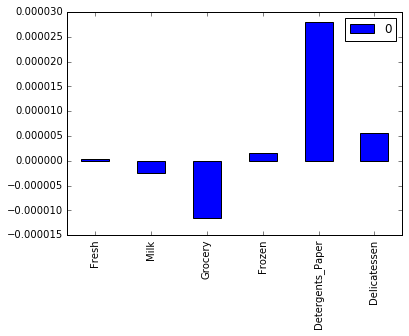

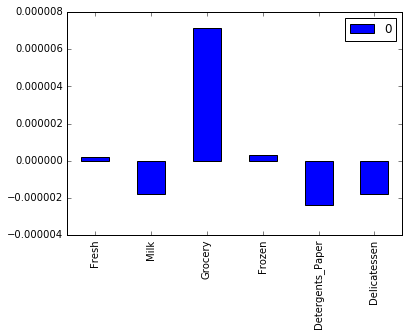

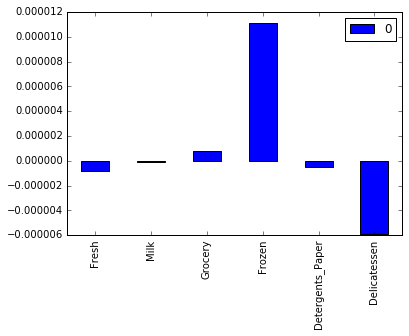

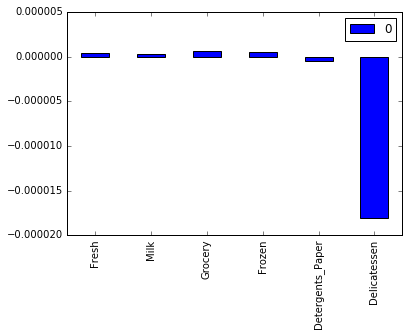

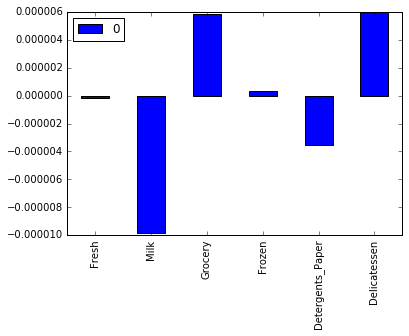

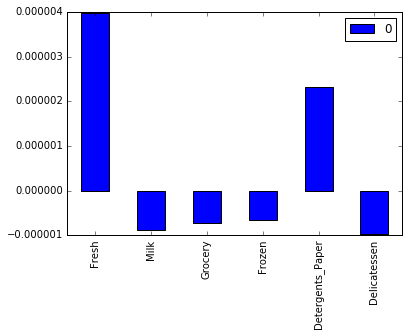

In [4]:
for x in ica.components_:
    pd.DataFrame(x, index=data.columns).plot(kind = 'bar')
    plt.show()

Answer: 
* Component 1 is positively correleted to Grocery. This means that the component increases as  the annual spend on groceries increases.
* Component 2 is strongly correlated with Delicatessen.
* Component 3 is negatively correlated with Milk. This means that the component decreases as the annual spend on milk increases
* Component 4 shows strong positive correlation with Fresh produce. As the annual spend on fresh produce increases, so does this component.

## Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

### Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer:
* In terms of speed, KMeans clustering runs slower than Gaussian Mixture Models, GMM.
* In terms of complexity, KMeans appear simpler than GMM
* In terms of boundary information, Kmeans uses distinct clusters while data points in GMM might belong to more than one cluster

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

Answer: We can see that the number of components optimal for GMM is 6. it is the the point at which the bic score is the lowest.<br>
For Kmeans, we also see the optimal number of clusters to be 6, which is the average point for all the different scores.

In [45]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [46]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)
print reduced_data[:10]  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


<Container object of 11 artists>

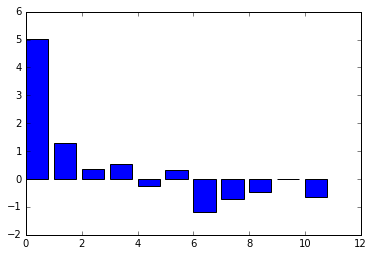

In [76]:
bics = []
for c in [2,3,4,5,6,7, 8, 9, 10, 11, 12]:
    bics.append(GMM(n_components=c).fit(reduced_data).bic(reduced_data))
plt.bar(range(11), RobustScaler().fit_transform(np.array(bics).reshape(-1, 1)))

In [80]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

clusters = GMM(n_components=6).fit(reduced_data)
print clusters

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=6, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)


In [81]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z_GMM = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [56]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids = clusters.means_
print centroids

[[  9535.08162622   2894.19935877]
 [ -5638.84255985  -2810.66335085]
 [-18446.57849686  45870.89042071]
 [  2961.28162427  -7171.7089963 ]
 [  3169.22733142  13343.33567218]
 [-31289.98805584  -6764.93243183]]


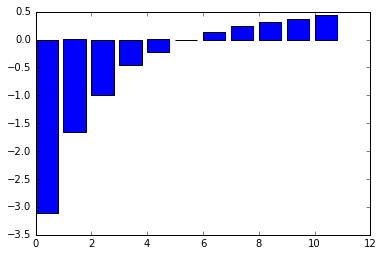

In [91]:
scores = []
for c in [2,3,4,5,6,7, 8, 9, 10, 11, 12]:
    scores.append(KMeans(n_clusters=c).fit(reduced_data).score(reduced_data))
plt.bar(range(11), RobustScaler().fit_transform(np.array(scores).reshape(-1, 1)))
Z_KMeans = KMeans(n_clusters=6).fit(reduced_data).predict(np.c_[xx.ravel(), yy.ravel()])

In [89]:
# Put the result into a color plot
def draw(Z, mode='KMeans'):
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title(mode + ' clustering on the wholesale grocery dataset (PCA-reduced data)\n'
              'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

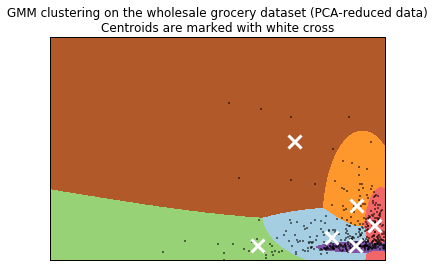

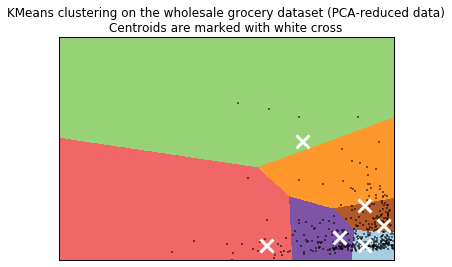

In [90]:
draw(Z_GMM, mode='GMM')
draw(Z_KMeans)

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: The central object in each cluster represents a generalization for other objects in the cluster. If we are dealing with customers, the central object represents a central customer which best whose features best describes other customers in the cluster.

### Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: There were 2 clustering techniques used here Clustering[KMeans and GMM]<br>
Before I go ahead, let me describe the dataset that we have here.
1. The data does not have many features
2. The size of the data is relatively small
3. Data is a homogeneous mixture

It is my opinion that GMM clustering gave me the most insight into the data.
GMM was able to separate the data into different clusters that could easily be visualized.<br>
In practise, GMM helpes you best represent uncertainty by allowing customers to belong to more than one cluster. Since customer behavior is not exactly rigid in real life, I feel that GMM will give more insight into data. This is because it accounts for bias in customer preferences. Customers are human beings and hard labelling them to specific behaviors might not give the best results.

**9)** How would you use that technique to help the company design new experiments?

Answer: There are two clustering algorithms here in question. KMeans and GMM. To further improve this experiment, we can use train 50% of the data using KMeans and compare how well the custer performs against the remaining 50% that is trained with GMM. This will help us guage which algorithm is a better one.

**10)** How would you use that data to help you predict future customer needs?

Answer: We can take advantage of supervised learning technique here - decision trees. Now, we know that the closest centroid to a datapoint can be used to generalize the point, we can also use the components that were used to create the centroid to decide on what a customer will need.